In [2]:
import pandas as pd
from proj1_helpers import *
from data_preprocessing import *
import sympy 

In [3]:
y, x, ids = load_csv_data("./data/train.csv", sub_sample=False)
x, mean_x, std_x = standardize(x)
y[0:20], mean_x, std_x

(array([ 1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        -1., -1.,  1., -1.,  1., -1., -1.]),
 array([-4.90230794e+01,  4.92398193e+01,  8.11819816e+01,  5.78959617e+01,
        -7.08420675e+02, -6.01237051e+02, -7.09356603e+02,  2.37309984e+00,
         1.89173324e+01,  1.58432217e+02,  1.43760943e+00, -1.28304708e-01,
        -7.08985189e+02,  3.87074191e+01, -1.09730480e-02, -8.17107200e-03,
         4.66602072e+01, -1.95074680e-02,  4.35429640e-02,  4.17172345e+01,
        -1.01191920e-02,  2.09797178e+02,  9.79176000e-01, -3.48329567e+02,
        -3.99254314e+02, -3.99259788e+02, -6.92381204e+02, -7.09121609e+02,
        -7.09118631e+02,  7.30645914e+01]),
 array([406.34483401,  35.34481492,  40.82860887,  63.65555431,
        454.47965615, 657.97098617, 453.01897051,   0.78290955,
         22.2734492 , 115.70588372,   0.84474126,   1.19358245,
        453.59581401,  22.41203584,   1.21407622,   1.81675941,
         22.06487828,   1.26497962,   1.81660763, 

In [4]:
train_data = pd.read_csv("data/train.csv.zip", na_values=-999)
cols = train_data.columns[2:]
train_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,100002,b,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,100003,b,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,...,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,100004,b,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,...,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


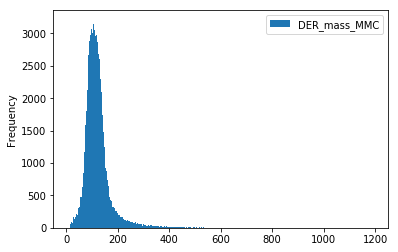

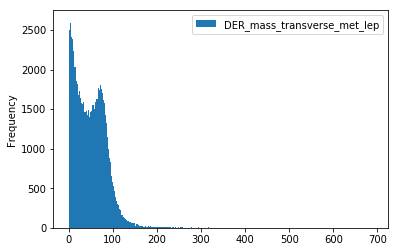

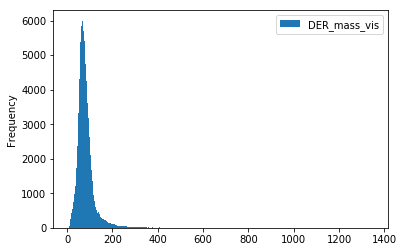

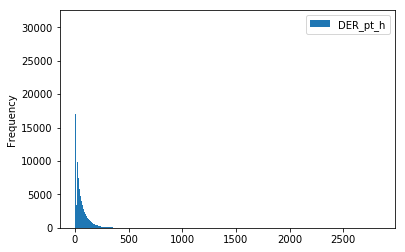

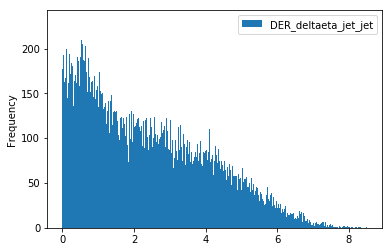

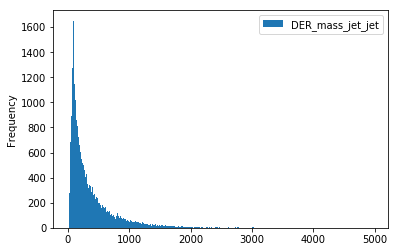

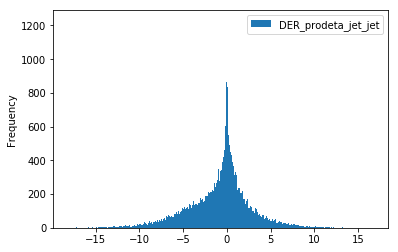

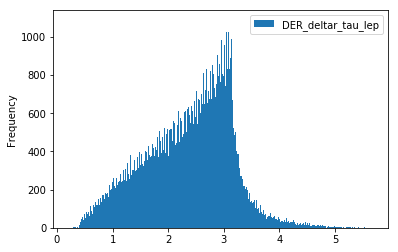

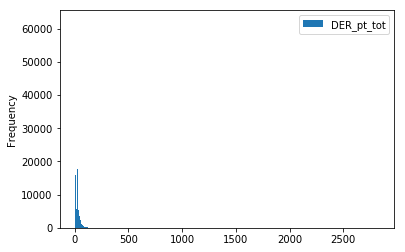

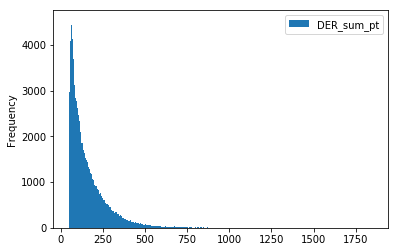

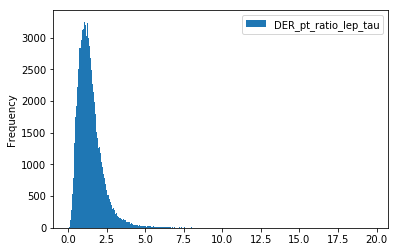

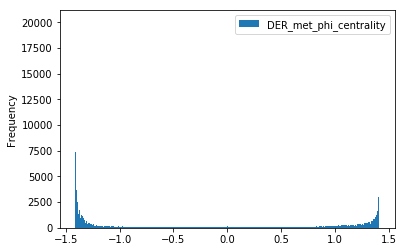

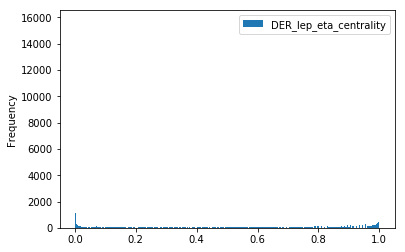

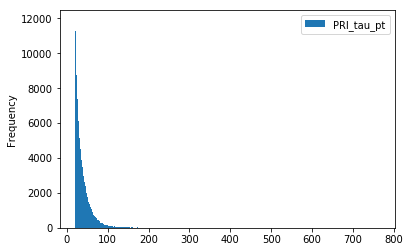

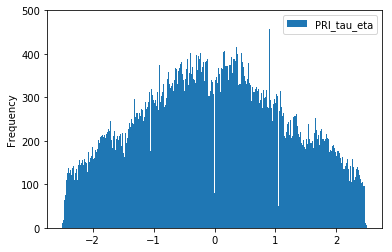

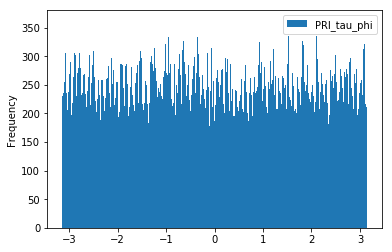

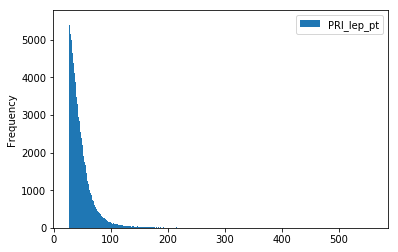

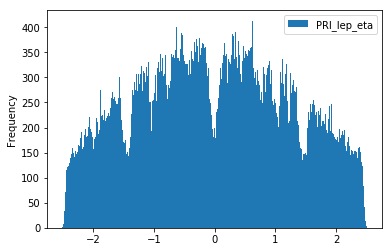

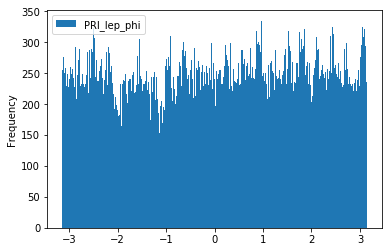

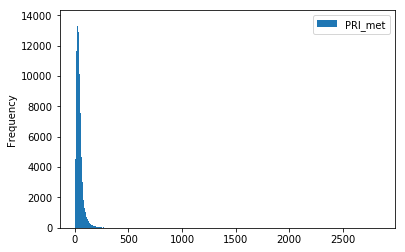

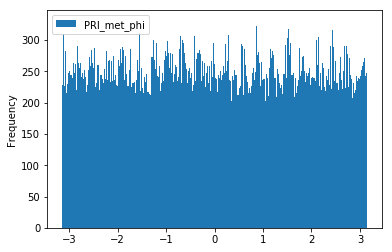

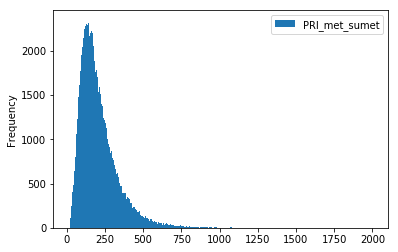

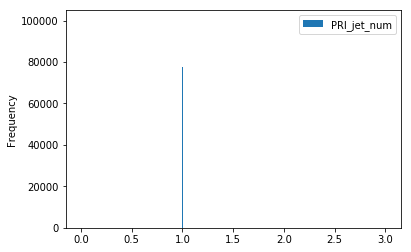

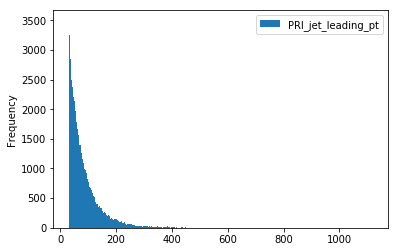

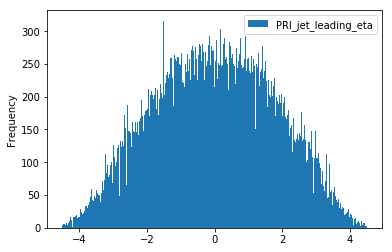

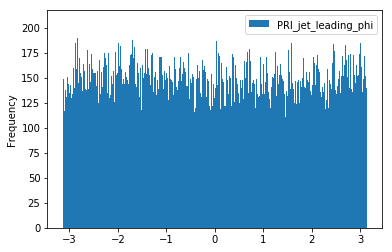

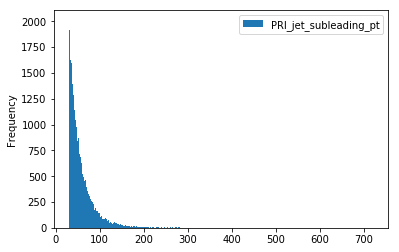

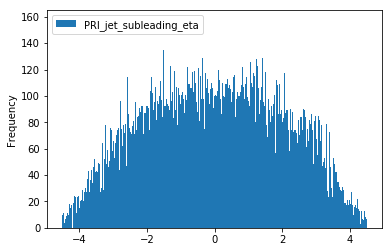

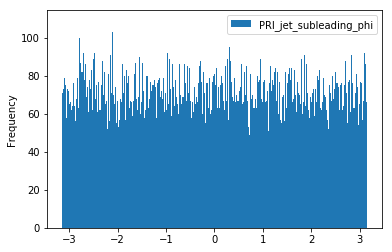

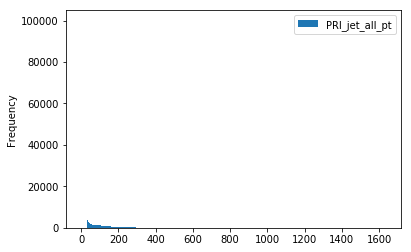

In [29]:
#Plots
for col in cols:
    train_data[[col]].plot.hist(train_data[col], bins=1000)

We can maybe drop the colums *-phi, since they have values scattered everywhere and I think that they do not give much information about the model. **Look at the feature descriptions. Phi are mainly angles**

In [6]:
# Tryng to figure out how many cols(features) are dependent
train_data_zero = train_data.fillna(0)
train_data_zero.drop(columns=['Id', 'Prediction'], inplace=True)
train_data_zero.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,0.000,0.00,0.000,46.226
2,0.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,0.000,0.00,0.000,44.251
3,143.905,81.417,80.943,0.414,0.00,0.000,0.000,3.310,0.414,75.968,...,0.060,86.062,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000
4,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,16.405,57.983,...,-0.871,53.131,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000


In [15]:
#test to find linear dependancy
columns = ['A','B', 'C']
df = pd.DataFrame(columns=columns)
df.A = [0,2,3,4]
df.B = df.A*2
df.C = [8,3,5,4]
df

,A,B,C
0,0,0,8
1,2,4,3
2,3,6,5
3,4,8,4


In [27]:
# testing the function
reduced_form, inds = sympy.Matrix(df.values).rref()
#df.iloc[:, inds]
idx = [] 
for i in inds:
    idx.append(i)
df.iloc[:, idx]

,A,C
0,0,8
1,2,3
2,3,5
3,4,4


In [28]:
# trying on real matrix
reduced_form, inds = sympy.Matrix(train_data_zero.values).rref()


KeyboardInterrupt: 